In [6]:
import pymysql
import pandas as pd
import numpy as np
import time
import re

# 连接数据库
db = pymysql.connect(host='localhost',port=3306,user='root',passwd='qwer',db='dataany')
# 获取游标
cursor = db.cursor()
tmsql = """
select 店铺id,店铺名称,日期,商品id,折扣价,销售额,销量,评论数 from dataany.tianmao 
"""

tmdf = pd.read_sql_query(tmsql,con=db)
cursor.close()
db.close()

In [7]:
tmdf['日期'] = pd.to_datetime(tmdf['日期'],format='%Y_%m')
tmdf['价位段'] = pd.cut(tmdf['折扣价'],bins=[0,50,100,150,200,3000])
tmdf.head(5)

,店铺id,店铺名称,日期,商品id,折扣价,销售额,销量,评论数,价位段
0,420751185,美一佳化妆品专营店,2018-10-01,567119376040,52.0,52.0,1,10,"(50, 100]"
1,389335512,露得清官方旗舰店,2018-10-01,568286063319,139.0,11676.0,84,1675,"(100, 150]"
2,1954193971,圣奈海外专营店,2018-10-01,45051617908,56.0,3976.0,71,113,"(50, 100]"
3,3697925558,innisfree海外旗舰店,2018-10-01,565051815898,99.0,1386.0,14,75,"(50, 100]"
4,2568052038,阿部药妆海外旗舰店,2018-10-01,566784617964,59.0,4897.0,83,118,"(50, 100]"


In [55]:
import matplotlib.pyplot as plt
#可视化显示在页面
%matplotlib inline
#更改设计风格
plt.style.use('ggplot')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签 plt.rcParam
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况,需要u'内容'

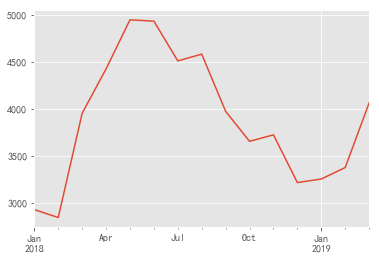

In [56]:
tmdf.日期.value_counts().sort_index().plot()

In [14]:
tmpiv = tmdf.pivot_table(index=['日期'],columns=['价位段'],values=['销量'],aggfunc='sum')
tmpiv

销量                                            
价位段         (0, 50] (50, 100] (100, 150] (150, 200] (200, 3000]
日期                                                             
2018-01-01    83069    179120      38932      14008       28553
2018-02-01    84845    313874      41597      16617       26702
2018-03-01   949834   2059314     266267     102623      191534
2018-04-01  1450385   2753330     297922     238340      141783
2018-05-01  1201862   3659775     340587     157878      199910
2018-06-01  1623318   4055569     511132     245014      189468
2018-07-01   863554   2305004     265485      74651      142304
2018-08-01   860030   1524888     196251      94992      162268
2018-09-01   321736    763827     133537      52065       79291
2018-10-01   192557    237383      45978      48309       56385
2018-11-01   193035    762397     219949     213207      242353
2018-12-01   136357    319547      63813      32507       72687
2019-01-01   145910    364716      60465      63139       83363
2019-02-01   328914    837800     172283     117801      198298
2019-03-01  1072387   3658570     661077     356496      710076

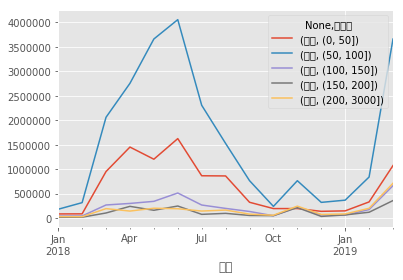

In [37]:
tmpiv.plot()

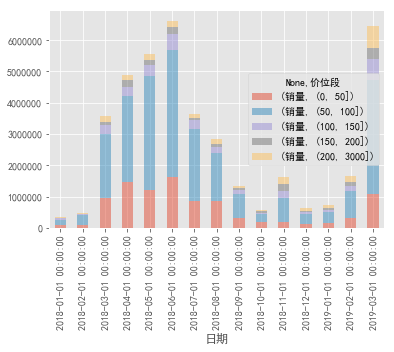

In [57]:
tmpiv.plot.bar(stacked=True,alpha=0.5)  #stacked=True堆积柱形图

In [17]:
# 百分比堆积柱形图没有特定的参数，需要自行在数据里调整
tmdf.pivot_table(index=['日期'],columns=['价位段'],values=['销量'],aggfunc=lambda x:(x.sum()/10000))

销量                                            
价位段          (0, 50] (50, 100] (100, 150] (150, 200] (200, 3000]
日期                                                              
2018-01-01    8.3069   17.9120     3.8932     1.4008      2.8553
2018-02-01    8.4845   31.3874     4.1597     1.6617      2.6702
2018-03-01   94.9834  205.9314    26.6267    10.2623     19.1534
2018-04-01  145.0385  275.3330    29.7922    23.8340     14.1783
2018-05-01  120.1862  365.9775    34.0587    15.7878     19.9910
2018-06-01  162.3318  405.5569    51.1132    24.5014     18.9468
2018-07-01   86.3554  230.5004    26.5485     7.4651     14.2304
2018-08-01   86.0030  152.4888    19.6251     9.4992     16.2268
2018-09-01   32.1736   76.3827    13.3537     5.2065      7.9291
2018-10-01   19.2557   23.7383     4.5978     4.8309      5.6385
2018-11-01   19.3035   76.2397    21.9949    21.3207     24.2353
2018-12-01   13.6357   31.9547     6.3813     3.2507      7.2687
2019-01-01   14.5910   36.4716     6.0465     6.3139      8.3363
2019-02-01   32.8914   83.7800    17.2283    11.7801     19.8298
2019-03-01  107.2387  365.8570    66.1077    35.6496     71.0076

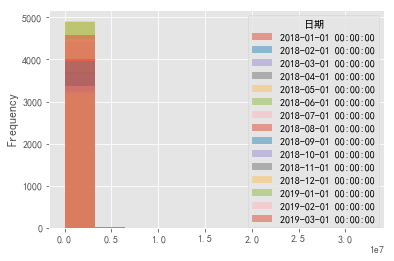

In [58]:
tmdf.groupby('日期').apply(lambda x:x.销售额).unstack().T.plot.hist(alpha=0.5)

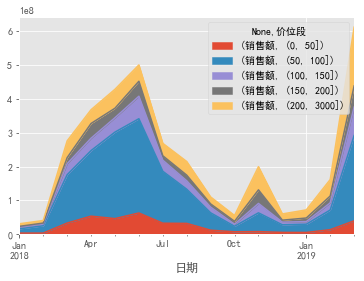

In [59]:
tmdf.pivot_table(index=['日期'],columns=['价位段'],values=['销售额'],aggfunc=np.sum).plot.area()